# run main

In [1]:
# import into Jypyter path which is (for some reason) different than python path
import sys
sys.path.append("R:/01_Analytics/plutusIO/plutusIO/calculator")
sys.path.append("R:/01_Analytics/plutusIO/plutusIO/core")
sys.path.append("R:/01_Analytics/plutusIO/plutusIO/context")

In [2]:
import main

Calculation done!


# plot results

In [3]:
import matplotlib.pyplot as plt
import _pickle as pickle
import redis
import pandas as pd

# fetch results
rredis = redis.StrictRedis(host='localhost', port=6379, db=0)
root = pickle.loads(rredis.get('root'))




## Party-level plots

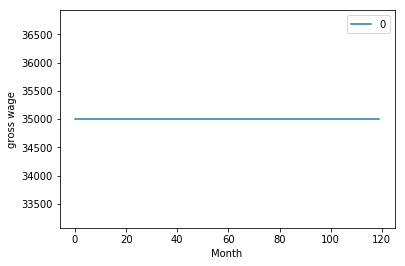

In [4]:
# turn into Pandas data.frame
plotData = pd.DataFrame.from_dict(root['resultBase']['runs']['uniqueRunID']['scenarios'][1]['parties']['00X'].grossWage, orient='index')
#print(plotData)

for label in plotData.columns.values:
    plt.plot(plotData[label], label = label)
plt.xlabel('Month')
plt.ylabel('gross wage')
plt.legend()
plt.show()

## Instrument-level plots

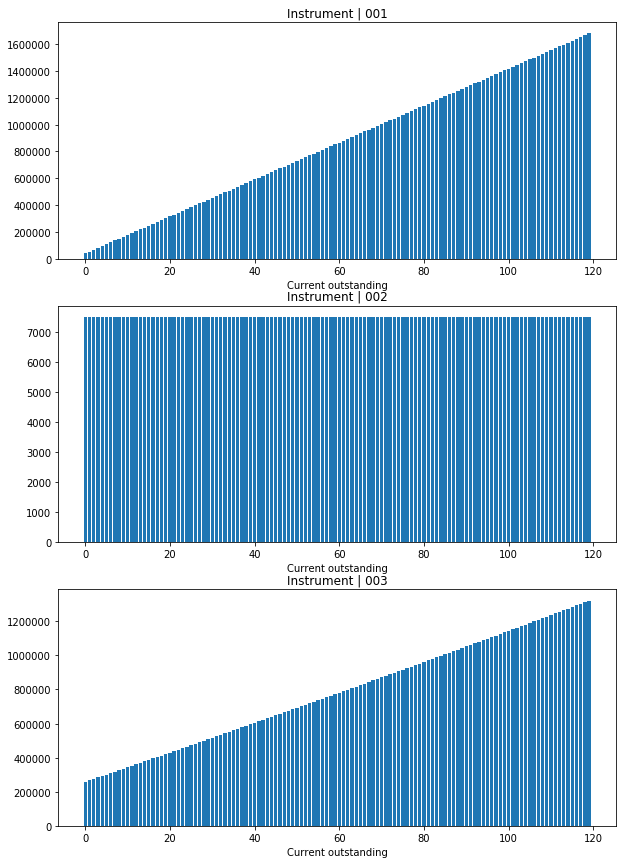

In [5]:
# turn into Pandas data.frame
# gimme all instruments from '00X':
instruments = root['facts']['relations'].party_instrument['00X']

instrument_results = root['resultBase']['runs']['uniqueRunID']['scenarios'][1]['instruments']
plt.figure(1, figsize=(10,20))

position_counter = 410
for instrument in instruments:
    position_counter = position_counter+1
    plotData = pd.DataFrame.from_dict(instrument_results[instrument].currentValue, orient='index', columns=['currentValue'])

    plt.subplot(position_counter)
    plt.bar(plotData.index, plotData.currentValue)
    plt.xlabel('Step')
    plt.xlabel('Current outstanding')
    plt.title('Instrument | ' + instrument)

plt.show()